# Obesity Risk Multiclass Competition 📈📊

Here I will make some analisys about the data that is used in this competition. Look at the final to see the correlation matrix, what are your thoughts?

The features of the dataset are those next:

- id: unique value identicator.
- Gender: Male of Female.
- Age: Age of the person.
- Height: Height of the person in meters.
- Weight: Weight of the person in kilograms.
- family_history_with_overweight: True or false if they have a family history of being overweight.
- FAVC: Frequent consumption of high caloric food.
- FCVC: Frequency of consuming vegetables.
- NCP: Number of main meals.
- CAEC: Consumption of food between meals.
- SMOKE: If the person is smoker or not.
- CH2O: Daily water consumption.
- SCC: Monitoring of calorie consumption.
- FAF: Frequency of physical activity.
- TUE: Time spent using technology devices.
- CALC: Alcohol consumption.
- MTRANS: Type of transportation used by the patient.
- <span style="color:red">NObeyesdad</span>: Class category of obesity risk.



In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_path = '/kaggle/input/playground-series-s4e2/train.csv'
test_path = '/kaggle/input/playground-series-s4e2/test.csv'

train = pd.read_csv(train_path)
test = pd.read_csv(test_path)

In [3]:
ds = train.isin([np.inf, -np.inf]) 
print(ds.sum().sum()) 

0


## Explotation of the features

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

### Target: NObeyesdad

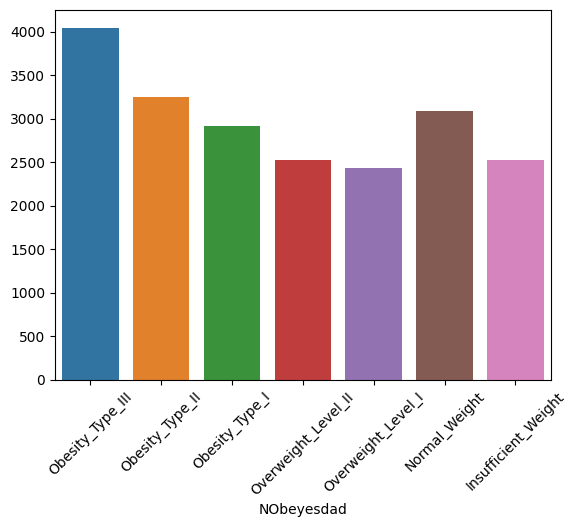

In [5]:
target = train['NObeyesdad'].value_counts()
# Let's reorder the clasifications.
columns_reorder = ['Obesity_Type_III', 'Obesity_Type_II', 
       'Obesity_Type_I', 'Overweight_Level_II',
       'Overweight_Level_I','Normal_Weight','Insufficient_Weight']
target = target.reindex(index = columns_reorder)
sns.barplot(x=target.index, y = target.values)
plt.xticks(rotation = 45) 
plt.show()

Here we can see the different categories, that we try to predict.

### Gender

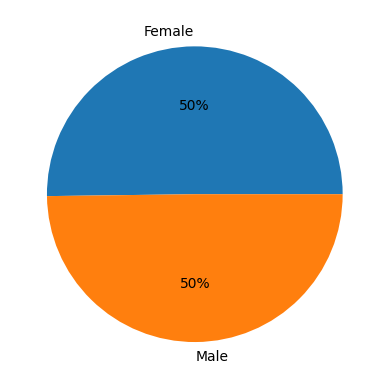

In [6]:
gender = train['Gender'].value_counts()
plt.pie(gender.values, labels=gender.index, autopct='%.0f%%')
plt.show()

It is 50% and 50% between male and female.

### Age Person

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


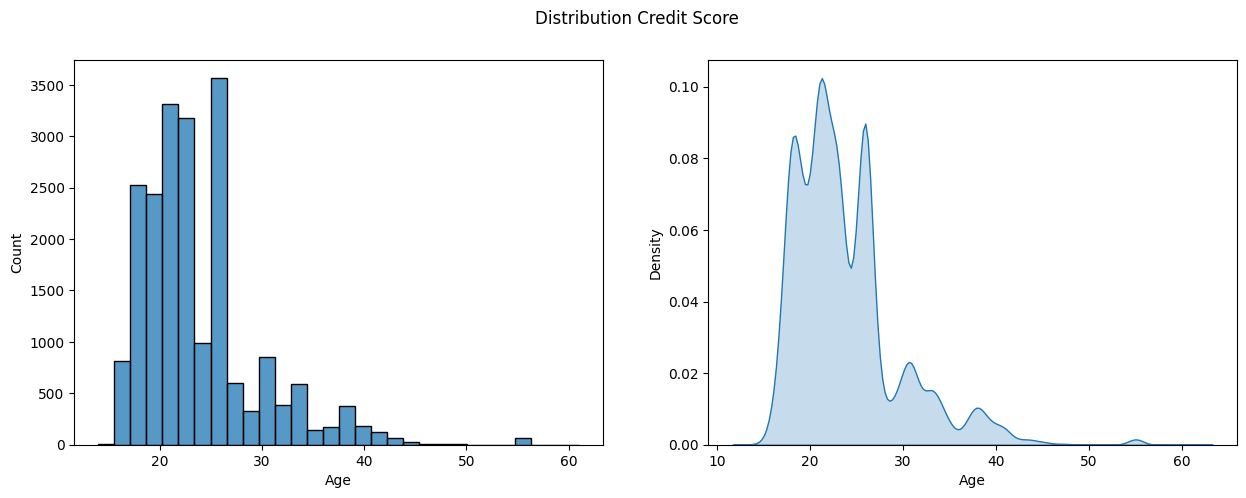

In [7]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.histplot(data=train, x = 'Age', bins=30, ax=ax[0])

sns.kdeplot(data=train, x = 'Age', fill=True, ax=ax[1])
fig.suptitle('Distribution Credit Score')
plt.show()

We have more young adult people in our dataset. 

### Height

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


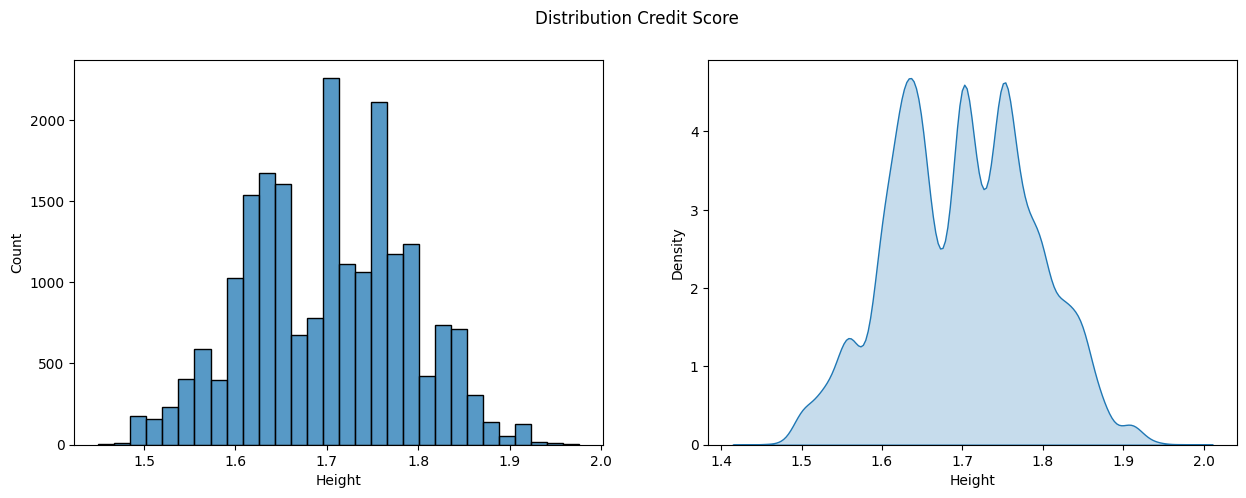

In [8]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.histplot(data=train, x = 'Height', bins=30, ax=ax[0])

sns.kdeplot(data=train, x = 'Height', fill=True, ax=ax[1])
fig.suptitle('Distribution Credit Score')
plt.show()

The height concentrates in around 1.7 meters.

### Weight

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


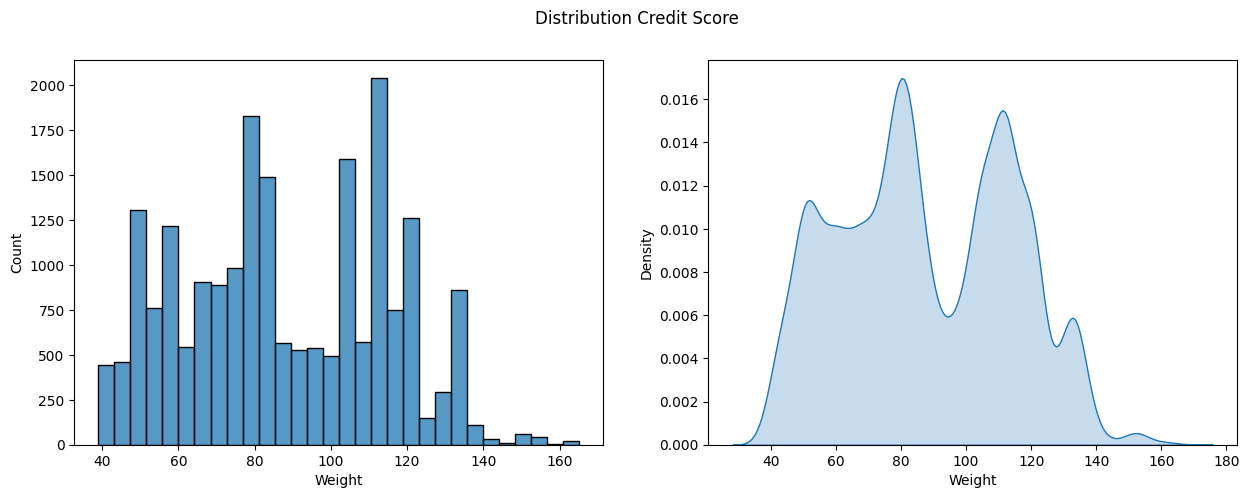

In [9]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.histplot(data=train, x = 'Weight', bins=30, ax=ax[0])

sns.kdeplot(data=train, x = 'Weight', fill=True, ax=ax[1])
fig.suptitle('Distribution Credit Score')
plt.show()

With this plot we can not see very much about, the weight it is all around between 40 and 160 in general. But we hot to have some relation between the weight and the category.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


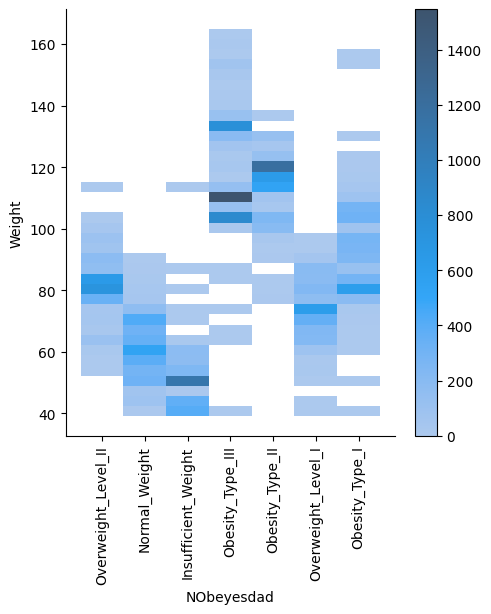

In [10]:
sns.displot(data=train, y='Weight', x ='NObeyesdad', cbar=True )
plt.xticks(rotation = 90)
plt.show()

Here we can see more clearly the relation. For example in obesity type 3, there is a concentration around 110.

### Family history

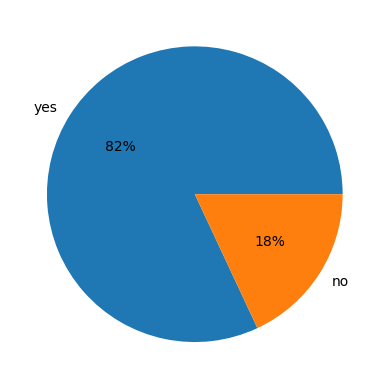

In [11]:
family = train['family_history_with_overweight'].value_counts()
plt.pie(family.values, labels=family.index, autopct='%.0f%%')
plt.show()

### Frequent consumption of high caloric food

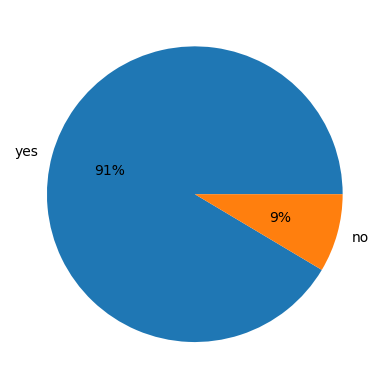

In [12]:
FAVC = train['FAVC'].value_counts()
plt.pie(FAVC.values, labels=FAVC.index, autopct='%.0f%%')
plt.show()

### Frequency of consuming vegetables
In this code we found that we have decimal values, so let see the distribution.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


[]

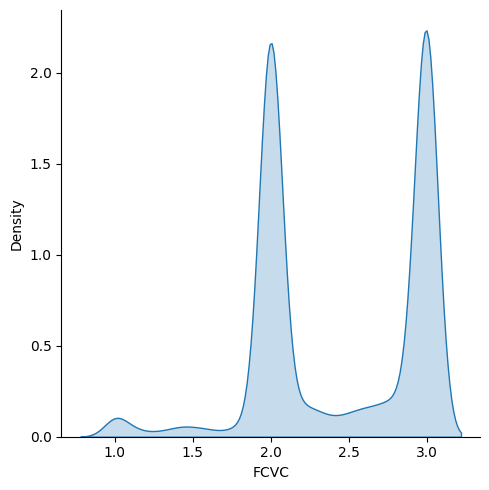

In [13]:
sns.displot(data=train, x='FCVC', kind='kde', fill=True)
plt.plot()

### Number of main meals

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


[]

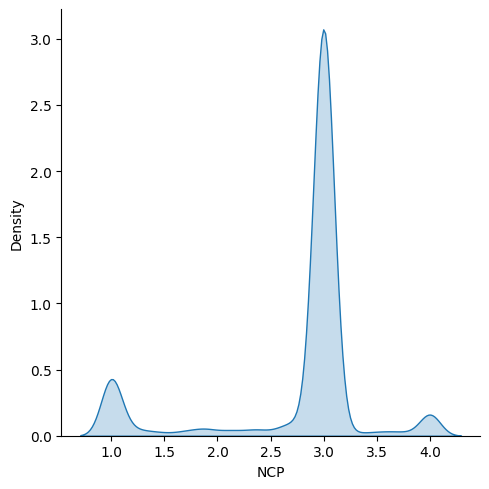

In [14]:
sns.displot(data=train, x='NCP', kind='kde', fill=True)
plt.plot()

### Consumption of food between meals

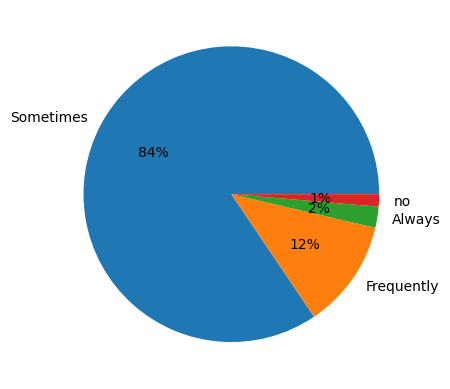

In [15]:
CAEC = train['CAEC'].value_counts()
plt.pie(CAEC.values, labels=CAEC.index, autopct='%.0f%%')
plt.show()

### Smoker

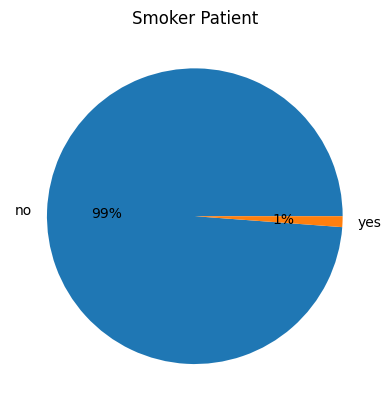

In [16]:
SMOKE = train['SMOKE'].value_counts()
plt.pie(SMOKE.values, labels=SMOKE.index, autopct='%.0f%%')
plt.title("Smoker Patient")
plt.show()

### Daily water consumption

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


[]

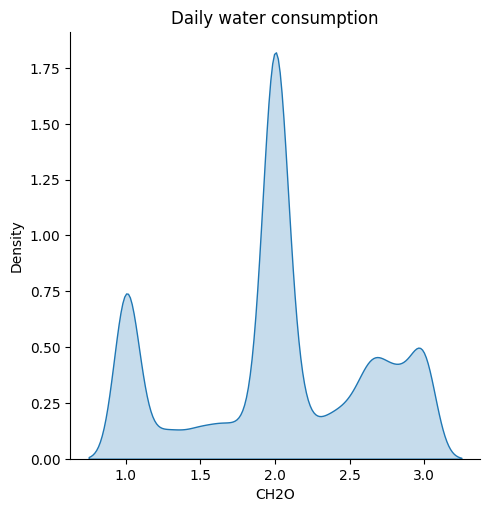

In [17]:
sns.displot(data=train, x='CH2O', kind='kde', fill=True)
plt.title('Daily water consumption')
plt.plot()

### Monitoring of calorie consumption

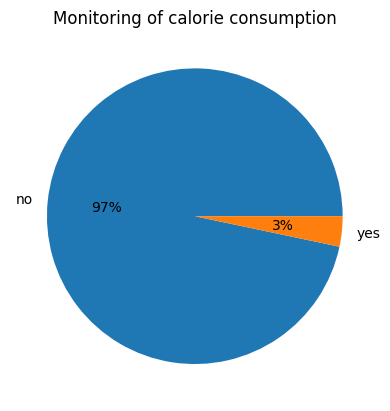

In [18]:
train['SCC'].describe()
SCC = train['SCC'].value_counts()
plt.pie(SCC.values, labels=SCC.index, autopct='%.0f%%')
plt.title("Monitoring of calorie consumption")
plt.show()

### Frequency of physical activity

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


[]

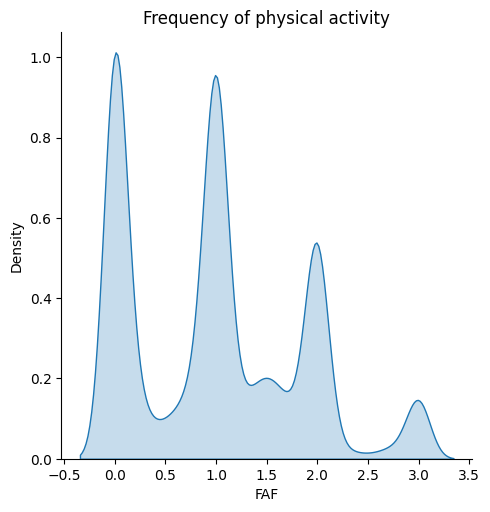

In [19]:
sns.displot(data=train, x='FAF', kind='kde', fill=True)
plt.title('Frequency of physical activity')
plt.plot()

### Time spent using technology devices

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


[]

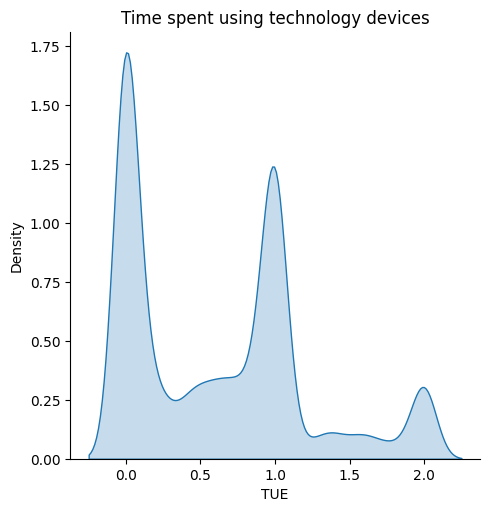

In [20]:
sns.displot(data=train, x='TUE', kind='kde', fill=True)
plt.title('Time spent using technology devices')
plt.plot()

### Alcohol consumption

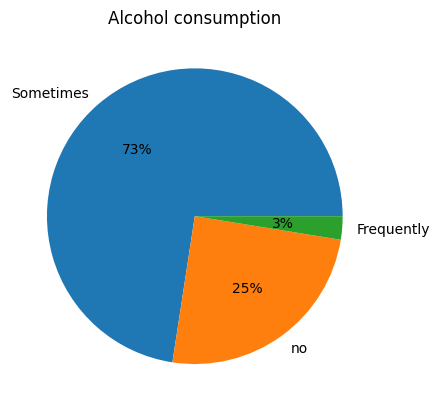

In [21]:
CALC = train['CALC'].value_counts()
plt.pie(CALC.values, labels=CALC.index, autopct='%.0f%%')
plt.title("Alcohol consumption")
plt.show()

### Type of transportation used by the patient

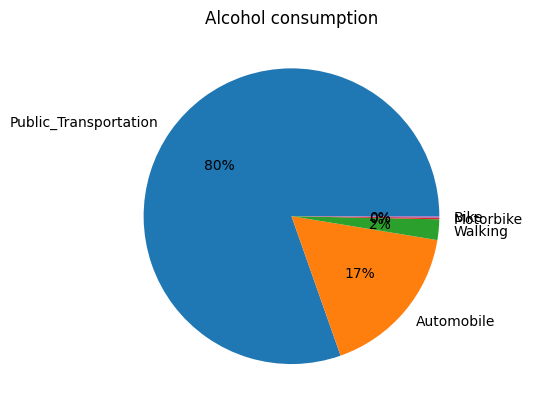

In [22]:
MTRANS = train['MTRANS'].value_counts()
plt.pie(MTRANS.values, labels=MTRANS.index, autopct='%.0f%%')
plt.title("Alcohol consumption")
plt.show()

In [23]:
MTRANS

MTRANS
Public_Transportation    16687
Automobile                3534
Walking                    467
Motorbike                   38
Bike                        32
Name: count, dtype: int64

Here we can see the categorie that looks weird in the chart.

---
Before plotting a correlation matrix, let's transform the categorical data. I will use one hot encoding.

In [24]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [25]:
object_columns = train.select_dtypes(include='object').columns.tolist()
train_one_hot = pd.get_dummies(train, columns=object_columns)

## Correlation Matrix

In [26]:
correlation_matrix = train_one_hot.corr()
target_corr = correlation_matrix.iloc[:,-7:]

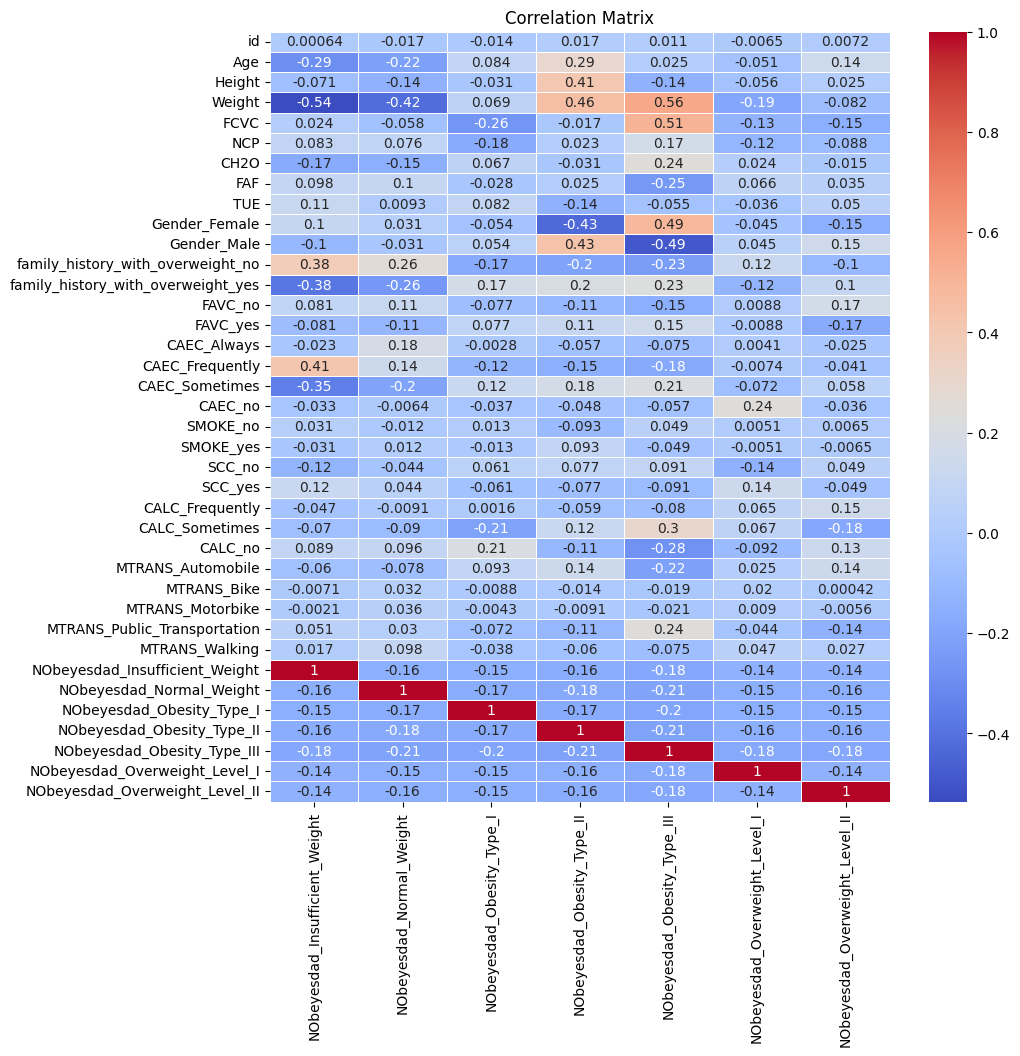

In [27]:

plt.figure(figsize=(10, 10))
sns.heatmap(target_corr, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

What other things do you see in this analisys? I read you ♥

@CarlosAlvro